In [1]:
import nltk

In [3]:
nltk.download_shell()  #show all the packages in nltk and here we will download 'stopwords' package for the work.
#'stopworks' is used to filter out the useless data from text while text-preprocessing (words like 'the','is','are' etc.).

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        Mathur\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
#rstrip stips off the specified characters from the string
#By default , it strips off all the whitespaces.

In [3]:
print(len(messages))

5574


In [4]:
#checking some messages
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                    names=['label','message'])

In [10]:
#checking contents of messages
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EXPLORATORY DATA ANALYSIS

In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages['length']=messages['message'].apply(len) #to find length of string message

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline


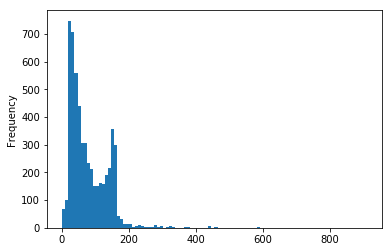

In [17]:
messages['length'].plot.hist(bins=100)

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0DA90EF0>,
      dtype=object)

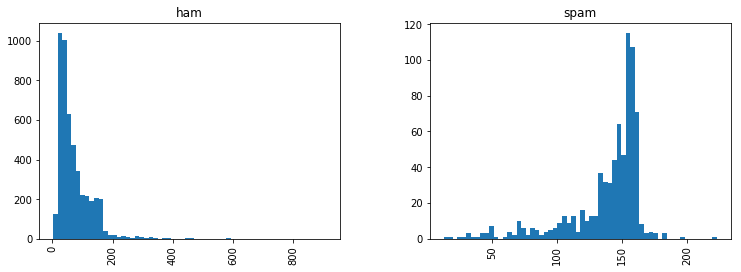

In [20]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

###### From this we can conclude that text messages that are 'ham' are smaller than the text messages that are 'spam' .

In [21]:
import string

In [22]:
#a sample message
mess = 'Sample message! Notice: it has punctuations.'


In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
nopunc=[c for c in mess if c not in string.punctuation]
#taking all the characters except the punctuation marks

In [25]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [26]:
from nltk.corpus import stopwords

In [27]:
stopwords.words('english') #listing all the stopwords in English language

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
nopunc = ''.join(nopunc)  #joining all the elements in a list

In [29]:
nopunc

'Sample message Notice it has punctuations'

In [30]:
nopunc.split()  #to get a list of separate words

['Sample', 'message', 'Notice', 'it', 'has', 'punctuations']

In [31]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 
#making message clean off the stopwords

In [32]:
clean_mess

['Sample', 'message', 'Notice', 'punctuations']

In [33]:
def text_process(mess):
    """
    1.remove punctuation
    2.remove stop words
    3.return list of clean text words
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

#### Vectorization:
Currently we have the messages as list of tokens and now we need to convert 
each of those messages into a vector that sci-kit learn algorithm models can work with.
So what we are going to do is convert each of the messages,which is again
represented by a list of tokens into a vector that machine learning 
models can understand.
We will do that in 3 steps using the bag-of-words model:

1.Count how many times a word occur in each message(known as term frequency)
2.Weigh the counts,so that frequent tokens get lower weight (inverse document frequency)                                       
3.Normalise the vectors to unit length,to abstract from the original text length(L2 norm) 

Lets begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS
corpus.We will first use scikit Learn's CountVectorizer. This model will convert a 
collection of text documents to a matrix of token counts.

We can imagine this as a 2-dimensional matrix, where the 1-dimension is
the entire vocabulary(1 row per word) and the other dimension are the actual 
documents,in this case a column per text message.

Since there are so many messages,we can expext a lot of zero counts for the presence of that word in the documnet. Because of this, Scikit Learn will output a Sparse Matrix.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the "CountVectorizer".
But in this case we will just specify the analyser to be our own previously
defined function:


In [38]:
print(len(bow_transformer.vocabulary_))

11425


In [40]:
mess4=messages['message'][3]

In [41]:
print(mess4)

U dun say so early hor... U c already then say...


In [43]:
bow4=bow_transformer.transform([mess4])

In [44]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [45]:
print(bow4.shape)

(1, 11425)


In [47]:
bow_transformer.get_feature_names()[4068] #'U' comes 2 times in message no.4

'U'

Creating bag of words of all the messages

In [48]:
messages_bow=bow_transformer.transform(messages['message'])

In [49]:
print('Shape of Sparse Matrix:',messages_bow.shape)

Shape of Sparse Matrix: (5572, 11425)


In [50]:
#checking count of non-zero occurrences
messages_bow.nnz

50548

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [57]:
tfidf4=tfidf_transformer.transform(bow4)

In [59]:
print(tfidf4) #show idf and tf relationship for this particular message

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [60]:
#checking document of the word 'university'
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [61]:
#converting entire 'bag of words' corpus into 'tfidf' corpus at once
messages_tfidf=tfidf_transformer.transform(messages_bow)


###### Using Naive-bayes classification

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [67]:
spam_detect_model.predict(tfidf4)[0]  #predicted category of the message

'ham'

In [66]:
messages['label'][3] #actual category of message

'ham'

Looks like our model is predciting correctly.

In [68]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [69]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Using train_test_split as till now we were predicting values only on the basis of 
the trained model,but not divided the data into training and testing models.

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],
                                                          messages['label'],test_size=0.3)

In [73]:
from sklearn.pipeline import Pipeline

In [81]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

#pipeline allows to specify the steps to perform

In [77]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0E186108>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [78]:
predictions=pipeline.predict(msg_test)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1445
       spam       1.00      0.73      0.84       227

avg / total       0.96      0.96      0.96      1672

